In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


In [2]:
# Load the dataset
file_path = "/content/ClimateChange.csv"
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136407 entries, 0 to 136406
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Date                136407 non-null  object 
 1   AvgTemp             136407 non-null  float64
 2   AvgTempUncertainty  136407 non-null  float64
 3   City                136407 non-null  object 
 4   Country             136407 non-null  object 
 5   Latitude            136407 non-null  object 
 6   Longitude           136407 non-null  object 
dtypes: float64(2), object(5)
memory usage: 7.3+ MB


In [3]:
df.head()

,Date,AvgTemp,AvgTempUncertainty,City,Country,Latitude,Longitude
0,01/01/1900,25.696,1.326,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,01/02/1900,27.816,0.789,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,01/03/1900,28.395,1.296,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,01/04/1900,27.706,0.501,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,01/05/1900,26.753,0.458,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [5]:
df.describe()

,AvgTemp,AvgTempUncertainty
count,136407.000000,136407.000000
mean,19.012924,0.460508
std,9.658291,0.296494
min,-26.772000,0.040000
25%,14.123000,0.273000
50%,21.349000,0.381000
75%,26.372500,0.554000
max,38.283000,4.756000


In [ ]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])


# Extract year and month for time-series analysis
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Function to convert Latitude and Longitude to numerical values
def convert_coordinates(coord):
  if isinstance(coord, str):  # Check if the value is a string
    value = float(coord[:-1])  # Remove the last character (N, S, E, W)
    if coord[-1] in ['S', 'W']:  # South and West should be negative
      value *= -1
    return value
  else:
    return coord  # Return the value as is if not a string


df['Latitude'] = df['Latitude'].apply(convert_coordinates)
df['Longitude'] = df['Longitude'].apply(convert_coordinates)

# Display processed data
df.head()


,Date,AvgTemp,AvgTempUncertainty,City,Country,Latitude,Longitude,Year,Month
0,1900-01-01,25.696,1.326,Abidjan,Côte D'Ivoire,5.63,-3.23,1900,1
1,1900-01-02,27.816,0.789,Abidjan,Côte D'Ivoire,5.63,-3.23,1900,1
2,1900-01-03,28.395,1.296,Abidjan,Côte D'Ivoire,5.63,-3.23,1900,1
3,1900-01-04,27.706,0.501,Abidjan,Côte D'Ivoire,5.63,-3.23,1900,1
4,1900-01-05,26.753,0.458,Abidjan,Côte D'Ivoire,5.63,-3.23,1900,1


<ipython-input-5-af10b0ba946a>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Year", y="AvgTemp", estimator="mean", ci=None)


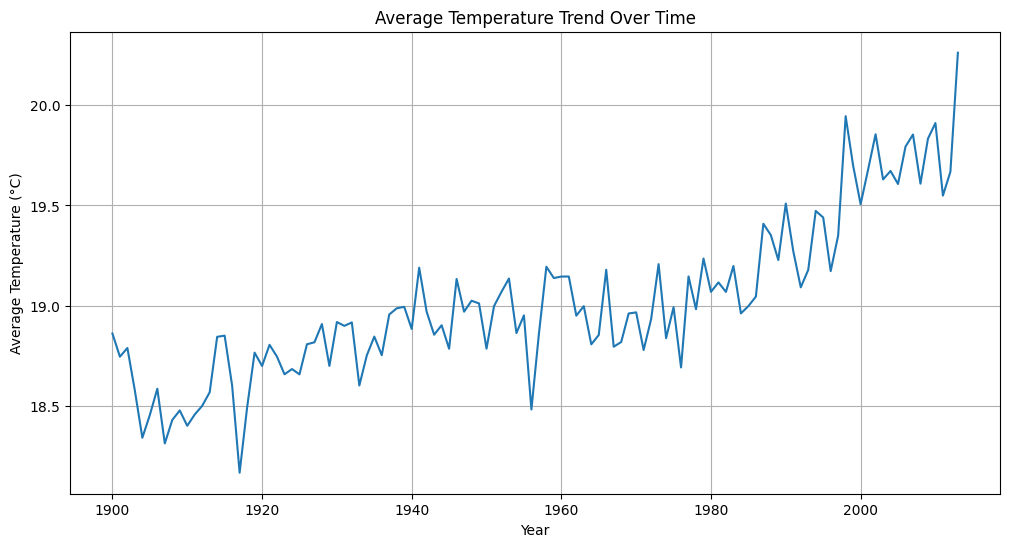

,0
Date,0
AvgTemp,0
AvgTempUncertainty,0
City,0
Country,0
Latitude,0
Longitude,0
Year,0
Month,0


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Plot temperature trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="AvgTemp", estimator="mean", ci=None)
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Average Temperature Trend Over Time")
plt.grid(True)
plt.show()

# Display missing values
missing_values

                     AvgTemp  AvgTempUncertainty  Latitude  Longitude  \
AvgTemp             1.000000            0.021564 -0.350325   0.033810   
AvgTempUncertainty  0.021564            1.000000 -0.138325  -0.072189   
Latitude           -0.350325           -0.138325  1.000000   0.173343   
Longitude           0.033810           -0.072189  0.173343   1.000000   
Year                0.034125           -0.355958  0.000060  -0.000177   
Month                    NaN                 NaN       NaN        NaN   

                        Year  Month  
AvgTemp             0.034125    NaN  
AvgTempUncertainty -0.355958    NaN  
Latitude            0.000060    NaN  
Longitude          -0.000177    NaN  
Year                1.000000    NaN  
Month                    NaN    NaN  


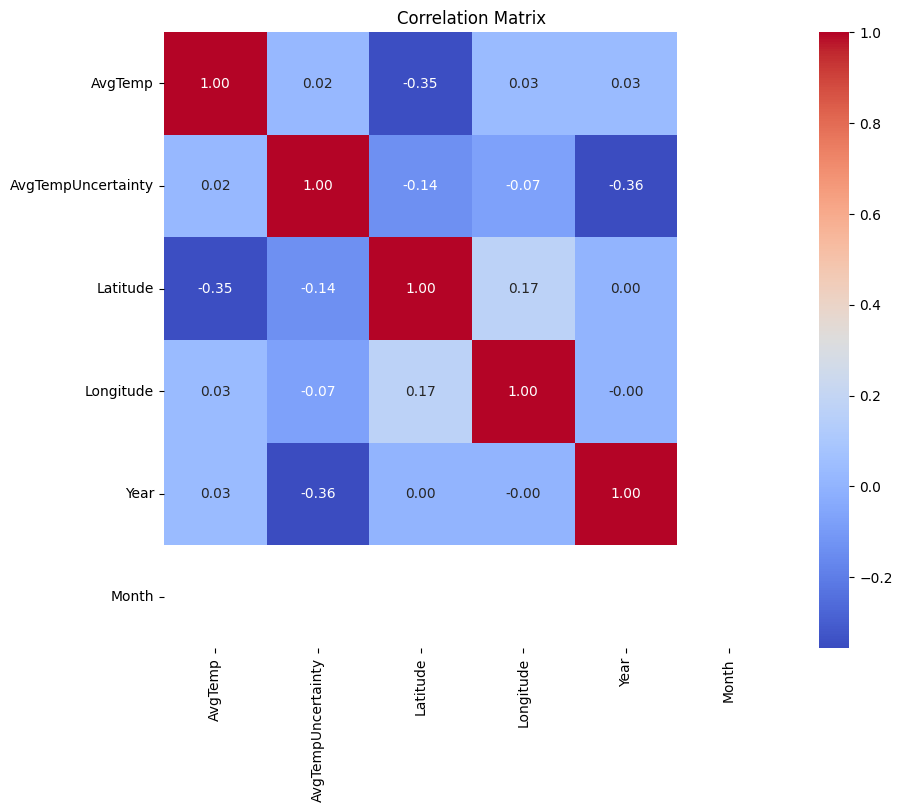

In [ ]:
# Select only numerical columns, excluding 'City' and 'Country'
numerical_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

<ipython-input-26-c83fbbd28edc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Year'], y=df['AvgTemp'], palette="coolwarm")


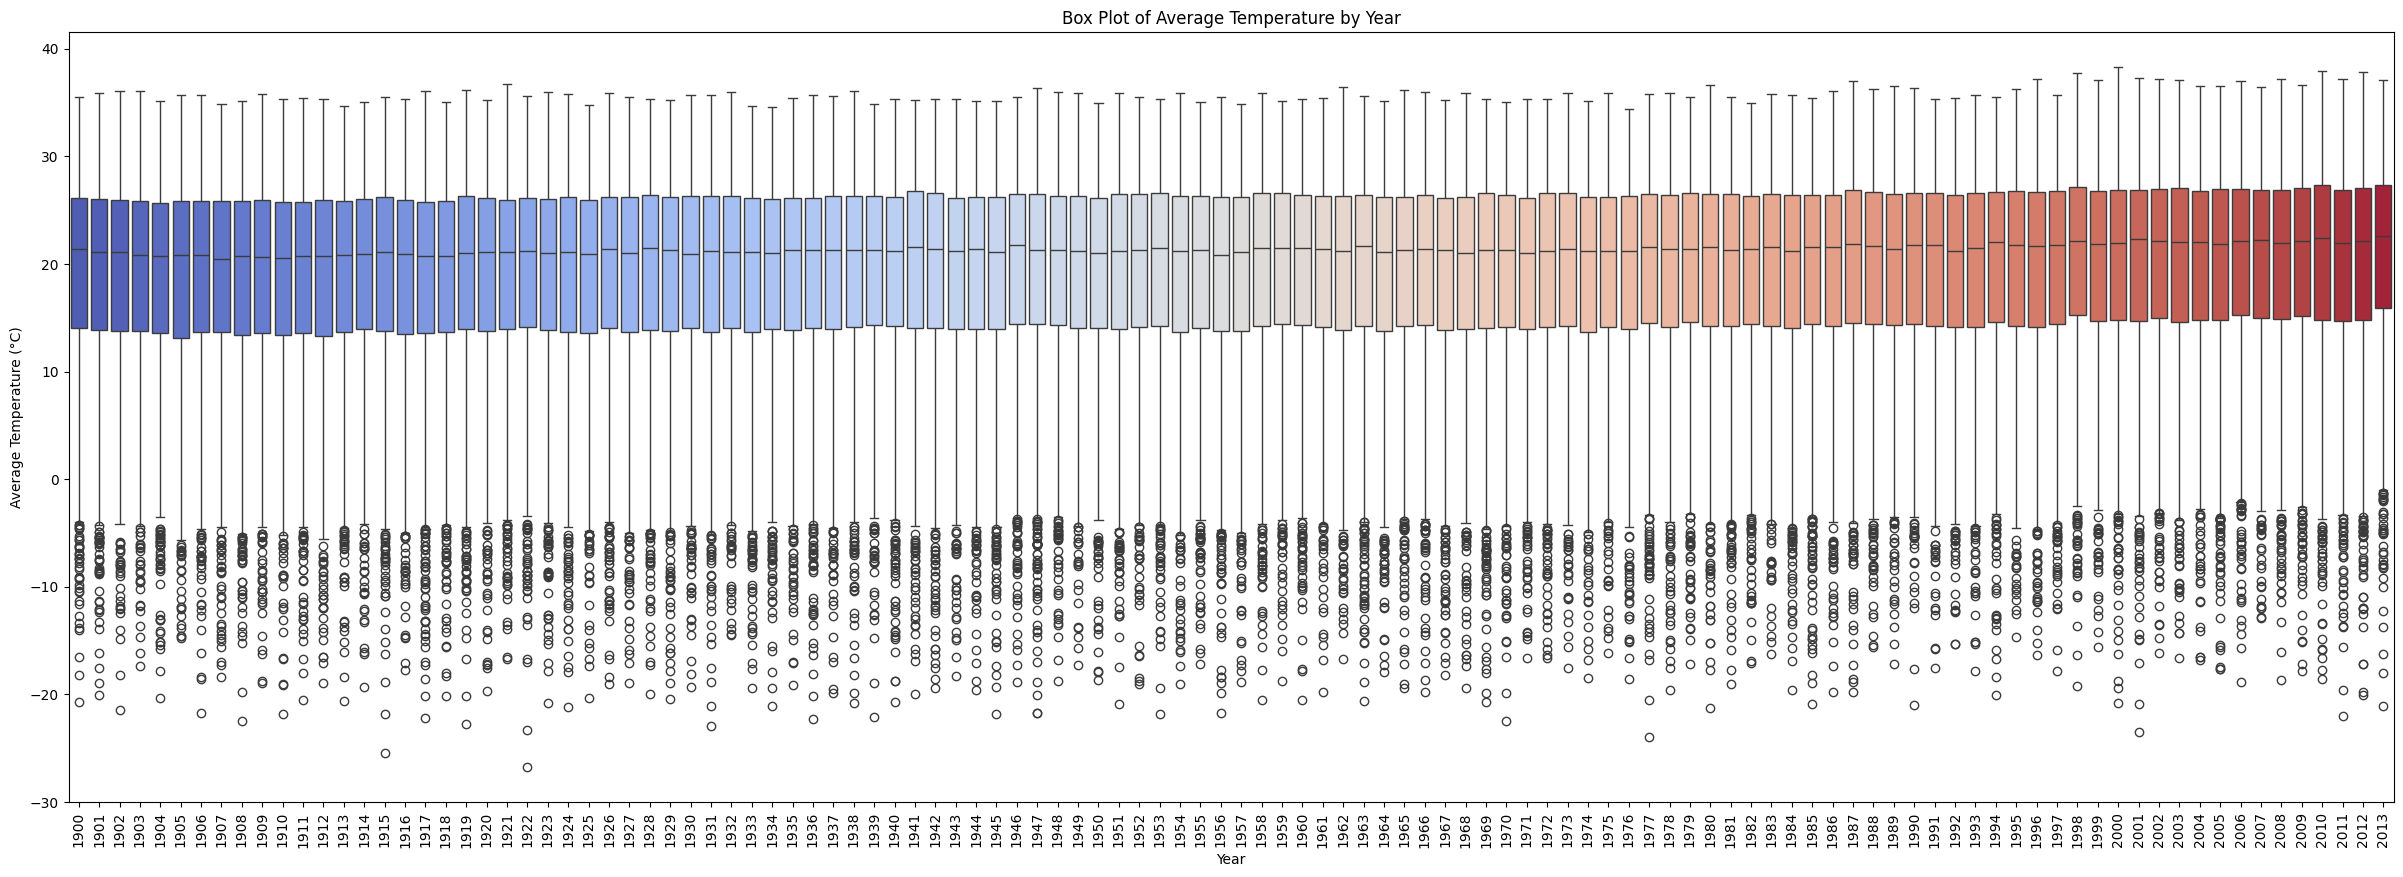

In [ ]:
# Box plot of AvgTemp by Year
plt.figure(figsize=(30, 10))
sns.boxplot(x=df['Year'], y=df['AvgTemp'], palette="coolwarm")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.title("Box Plot of Average Temperature by Year")
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Select features and target variable
X = df[['Year', 'Month', 'Latitude', 'Longitude']]
y = df['AvgTemp']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values using the mean
imputer = SimpleImputer(strategy='mean') # Create an imputer instance
X_train = imputer.fit_transform(X_train) # Fit and transform on training data
X_test = imputer.transform(X_test) # Transform test data using the trained imputer


# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mae, mse, r2

(7.105913541925154, 80.54226230717326, 0.1289762144769634)

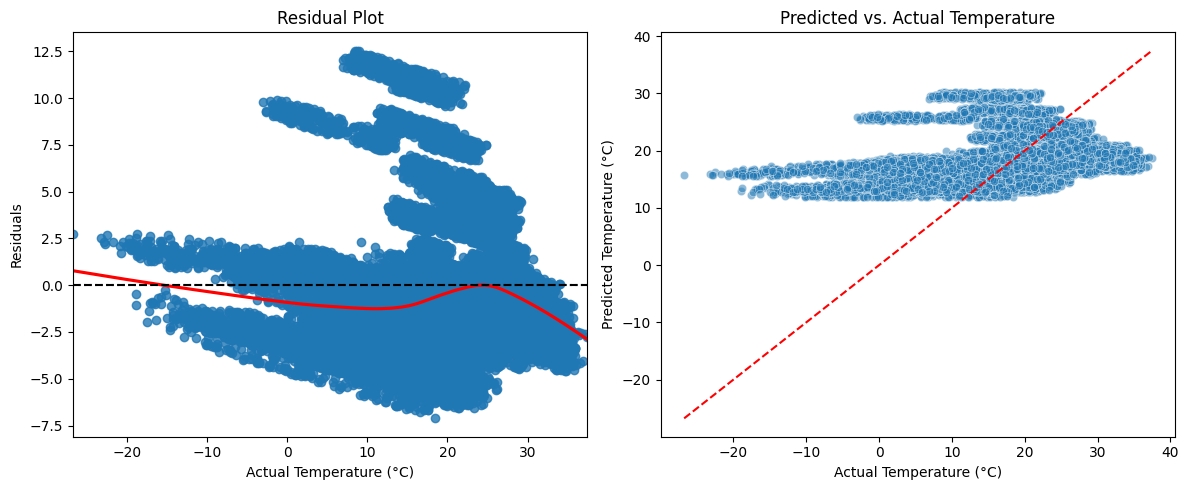

In [ ]:
# Visualizing model performance

plt.figure(figsize=(12, 5))

# Residual Plot
plt.subplot(1, 2, 1)
sns.residplot(x=y_test, y=y_pred - y_test, lowess=True, line_kws={"color": "red"})
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(0, color='black', linestyle='--')

# Predicted vs. Actual Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle="--")
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Predicted vs. Actual Temperature")

plt.tight_layout()
plt.show()


In [ ]:
# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Perform cross-validation (5 folds)
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

mae_rf, mse_rf, r2_rf, cv_scores.mean()


(5.083600887974444, 48.78609941880501, 0.4724030368726535, 0.39934623314841744)

In [ ]:
# Aggregate data by Year and Location (Latitude, Longitude) to reduce size
df_yearly = df.groupby(['Year', 'Latitude', 'Longitude'], as_index=False).agg({'AvgTemp': 'mean'})

# Define features and target variable
X_reduced = df_yearly[['Year', 'Latitude', 'Longitude']]
y_reduced = df_yearly['AvgTemp']

# Split the data
X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

# Train a Random Forest with limited depth
rf_model_reduced = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
rf_model_reduced.fit(X_train_red, y_train_red)

# Predict and evaluate
y_pred_rf_red = rf_model_reduced.predict(X_test_red)

mae_rf_red = mean_absolute_error(y_test_red, y_pred_rf_red)
mse_rf_red = mean_squared_error(y_test_red, y_pred_rf_red)
r2_rf_red = r2_score(y_test_red, y_pred_rf_red)

mae_rf_red, mse_rf_red, r2_rf_red


(0.39785422358835426, 0.2763959502498282, 0.9948101165955865)

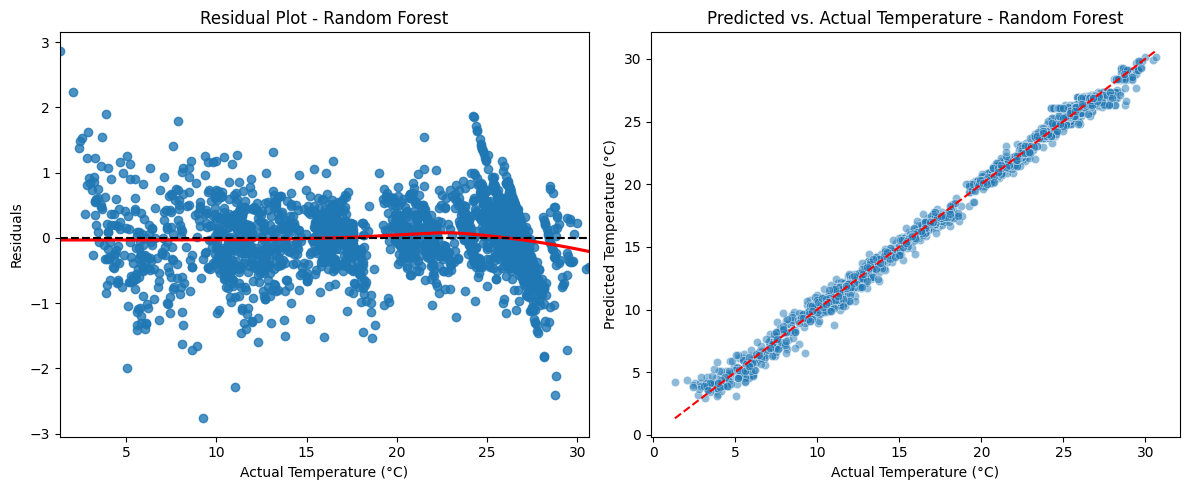

In [ ]:
# Visualizing Random Forest model performance

plt.figure(figsize=(12, 5))

# Residual Plot
plt.subplot(1, 2, 1)
sns.residplot(x=y_test_red, y=y_pred_rf_red - y_test_red, lowess=True, line_kws={"color": "red"})
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Residuals")
plt.title("Residual Plot - Random Forest")
plt.axhline(0, color='black', linestyle='--')

# Predicted vs. Actual Plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_red, y=y_pred_rf_red, alpha=0.5)
plt.plot([y_test_red.min(), y_test_red.max()], [y_test_red.min(), y_test_red.max()], color='red', linestyle="--")
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Predicted vs. Actual Temperature - Random Forest")

plt.tight_layout()
plt.show()
